<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the dependancyes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/train.csv')

In [ ]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# Check the shape of the dataset
data.shape

(404290, 6)

In [ ]:
# Check duplicate in th edataset
data.duplicated().sum()

0

In [ ]:
# Checking for data imbalenced
data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
# Repeated questions

qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


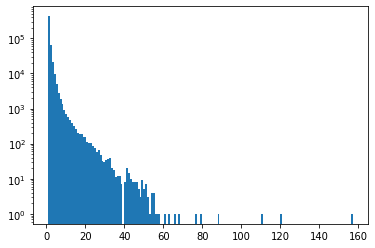

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Science the dataset is too big to handle so i decide to work with only 30000 rowes

In [ ]:
data = data.sample(30000)

In [ ]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
#Create dataset which having only questions pairs
question_data = data[['question1','question2']]

In [ ]:
question_data.head()

,question1,question2
81993,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?
258165,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...
282841,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...
4014,Why do people still think the the world is flat?,Why do some people today still believe that th...
333705,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?


In [ ]:
from numpy.lib.shape_base import vsplit
from sklearn.feature_extraction.text import CountVectorizer

# Merge text in q1 and q2
questions = list(question_data['question1'])+list(question_data['question2'])

# using only 3000 featers in CountVectorizer 
cv = CountVectorizer(max_features = 3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= question_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= question_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df['is_duplicate'] = data['is_duplicate']

In [ ]:
temp_df.shape

(30000, 6001)

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.742

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)  
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6798333333333333

## Trying to solve this problam creation some featers

In [25]:
data.shape

(30000, 6)

In [26]:
data['q1_len'] = data['question1'].str.len()
data['q2_len'] = data['question2'].str.len()

In [27]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
81993,81993,139134,139135,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?,0,46,40
258165,258165,373642,373643,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...,0,44,57
282841,282841,402858,402859,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...,0,51,105
4014,4014,7948,7949,Why do people still think the the world is flat?,Why do some people today still believe that th...,1,48,112
333705,333705,167210,44495,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?,1,58,34


In [28]:
data['q1_num_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
data['q2_num_words'] = data['question2'].apply(lambda row: len(row.split(" ")))
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
81993,81993,139134,139135,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?,0,46,40,8,8
258165,258165,373642,373643,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...,0,44,57,7,8
282841,282841,402858,402859,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...,0,51,105,8,18
4014,4014,7948,7949,Why do people still think the the world is flat?,Why do some people today still believe that th...,1,48,112,10,21
333705,333705,167210,44495,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?,1,58,34,9,6


In [29]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [30]:
data['word_common'] = data.apply(common_words, axis=1)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
81993,81993,139134,139135,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?,0,46,40,8,8,4
258165,258165,373642,373643,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...,0,44,57,7,8,4
282841,282841,402858,402859,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...,0,51,105,8,18,3
4014,4014,7948,7949,Why do people still think the the world is flat?,Why do some people today still believe that th...,1,48,112,10,21,7
333705,333705,167210,44495,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?,1,58,34,9,6,5


In [31]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [32]:
data['word_total'] = data.apply(total_words, axis=1)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
81993,81993,139134,139135,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?,0,46,40,8,8,4,16
258165,258165,373642,373643,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...,0,44,57,7,8,4,15
282841,282841,402858,402859,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...,0,51,105,8,18,3,24
4014,4014,7948,7949,Why do people still think the the world is flat?,Why do some people today still believe that th...,1,48,112,10,21,7,28
333705,333705,167210,44495,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?,1,58,34,9,6,5,15


In [33]:
data['word_share'] = round(data['word_common']/data['word_total'],2)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
81993,81993,139134,139135,Is the weather better in Sydney than Auckland?,What is life like in Sydney vs Auckland?,0,46,40,8,8,4,16,0.25
258165,258165,373642,373643,How can we explain the photoelectric effect?,Why doesn't wave theory explain the photoelect...,0,44,57,7,8,4,15,0.27
282841,282841,402858,402859,How can you cancel a Specsavers appointment on...,I'm being charged $100 missed appointment fee ...,0,51,105,8,18,3,24,0.12
4014,4014,7948,7949,Why do people still think the the world is flat?,Why do some people today still believe that th...,1,48,112,10,21,7,28,0.25
333705,333705,167210,44495,What would happen if forged ₹2000 note starts ...,What would happen if ₹2000 forged?,1,58,34,9,6,5,15,0.33
